# 1. FER2013 Dataset 전처리 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

### 1.1. 전처리에 사용될 하이퍼 패러미터 선언

In [2]:
# Constants for FER2013 dataset
FER2013_IN_DIR = "datasets/fer2013/raw/"
FER2013_OUT_DIR = "datasets/fer2013/prep/"
FER2013_WIDTH = 48
FER2013_HEIGHT = 48

In [3]:
data = pd.read_csv(FER2013_IN_DIR + "fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Happy와 Sad만 추출

In [4]:
data = data[(data.emotion == 3) | (data.emotion == 4)]
data = data.replace(3, 0)
data = data.replace(4, 1)
data.head()

,emotion,pixels,Usage
3,1,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
6,1,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,0,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,0,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
14,0,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training


In [5]:
data = data.reset_index()
data = data.drop(['index'], axis=1)
data.head()

,emotion,pixels,Usage
0,1,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
1,1,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
2,0,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
3,0,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
4,0,4 2 13 41 56 62 67 87 95 62 65 70 80 107 127 1...,Training


### 1.2. FER2013 Dataset의 구성

In [6]:
data["Usage"].value_counts()

Training       12045
PublicTest      1548
PrivateTest     1473
Name: Usage, dtype: int64

In [7]:
Emotions = ["Happy", "Sad"]  # indices 0 to 6

In [8]:
data["emotion"].value_counts(sort=False)

0    8989
1    6077
Name: emotion, dtype: int64

### 1.3. 샘플 데이터 확인

In [9]:
def fer2013_show_instance(index):
    """Shows the image and the emotion label of the index's instance."""
    image = np.reshape(data.at[index, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    image -= np.mean(image)
    image /= np.std(image)
    print(Emotions[data.at[index, "emotion"]])
    plt.imshow(image, cmap="gray")

Happy


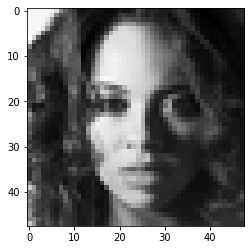

In [10]:
fer2013_show_instance(np.random.randint(90,len(data)))

### 1.4. Dataset의 4D Array화

In [11]:
def fer2013_to_X():
    """Transforms the (blank separated) pixel strings in the DataFrame to an 3-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image)."""
    
    X = []
    pixels_list = data["pixels"].values
    
    for pixels in pixels_list:
        single_image = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
        X.append(single_image)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(X), -1)
    
    # Normalize image data:
    X -= np.mean(X, axis=0)
    X /= np.std(X, axis=0)
    
    return X

In [12]:
# Get features (image data)
X = fer2013_to_X()
X.shape

(15066, 48, 48, 1)

In [13]:
# Get labels (one-hot encoded)
y = pd.get_dummies(data['emotion']).values
y.shape

(15066, 2)

In [14]:
# Save data
np.save(FER2013_OUT_DIR  + "fer2013_X", X)
np.save(FER2013_OUT_DIR  + "fer2013_y", y)